## Notes/Observations
- This is a more modern implemeatationof LeNet-5.
- Hence ReLU is used as the activation function instead of tanh.
- Parameters: 44k
- Test Accuracy: 99.01%

## Import the required libraries

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [2]:
print(keras.__version__)

2.4.3


## Load and explore the data

In [3]:
(x_train, y_train),(x_test, y_test)= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (60000, 28, 28) 	dtype: uint8
y_train: (60000,) 		dtype: uint8
x_test: (10000, 28, 28) 	dtype: uint8
y_test: (10000,) 		dtype: uint8


## Normalize the data

In [5]:
mean = np.mean(x_train)
print(mean)

33.318421449829934


In [6]:
std = np.std(x_train)
print(std)

78.56748998339798


In [7]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [8]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

## Reshape input and one hot encode labels

In [9]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [10]:
from keras.utils import to_categorical
y_train =  to_categorical(y_train)
y_test  =  to_categorical(y_test)

In [11]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (60000, 28, 28, 1) 	dtype: float32
y_train: (60000, 10) 		dtype: float32
x_test: (10000, 28, 28, 1) 	dtype: float32
y_test: (10000, 10) 		dtype: float32


## Build the LeNet-5 model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten

In [13]:
model = Sequential()

model.add(Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))  

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compile and Train the model

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Saved Models')

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('MNIST_LeNet_5.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Mounted at /content/drive


In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=(0.2), batch_size=128, epochs=15, callbacks=mc)

Epoch 1/15
375/375 [==============================] - 8s 4ms/step - loss: 0.7380 - accuracy: 0.7832 - val_loss: 0.1373 - val_accuracy: 0.9602

Epoch 00001: val_loss improved from inf to 0.13732, saving model to MNIST_LeNet_5.h5
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1281 - accuracy: 0.9619 - val_loss: 0.0833 - val_accuracy: 0.9747

Epoch 00002: val_loss improved from 0.13732 to 0.08325, saving model to MNIST_LeNet_5.h5
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0628 - val_accuracy: 0.9806

Epoch 00003: val_loss improved from 0.08325 to 0.06280, saving model to MNIST_LeNet_5.h5
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0545 - val_accuracy: 0.9841

Epoch 00004: val_loss improved from 0.06280 to 0.05454, saving model to MNIST_LeNet_5.h5
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.

## Test the model

In [17]:
# Loading model with the lowest validation loss
model = keras.models.load_model("MNIST_LeNet_5.h5")

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Set')
print('Loss:', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0314 - accuracy: 0.9901
Test Set
Loss: 0.0314016155898571
Accuracy 0.9901000261306763


## Prediction

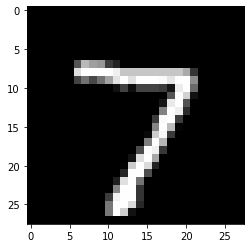

In [19]:
# Set the index of the image in test set for which the output must be predicted
# Valid ind values range is: 0, 1, 2, ... 9999
ind = 0
plt.imshow(((x_test[ind]*std + mean).astype(np.uint8)).squeeze(), cmap='gray')

In [20]:
pred = model.predict(x_test[ind].reshape(1,28,28,1))
print('The pridicted probability different classes is')
print(pred)
print('The predicted digit is', pred.argmax())
print('The actual digit is', y_test[ind].argmax())

The pridicted probability different classes is
[[6.3683547e-09 1.2184142e-08 8.6348218e-06 9.2856557e-04 4.4556199e-11
  4.3430497e-08 2.0756662e-12 9.9885881e-01 4.0216937e-06 1.9997425e-04]]
The predicted digit is 7
The actual digit is 7


## Loss and Accuracy Curves

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [22]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x_axis = range(1, len(train_loss)+1)

Text(0.5, 1.0, 'Loss Curve')

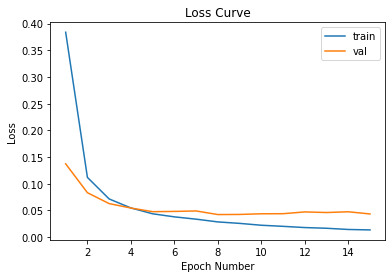

In [23]:
plt.plot(x_axis, train_loss, label='train')
plt.plot(x_axis, val_loss, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

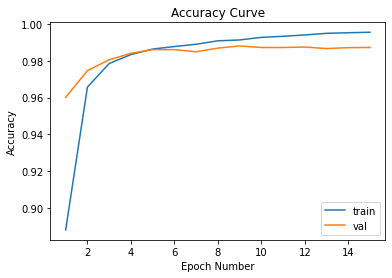

In [24]:
plt.plot(x_axis, train_acc, label='train')
plt.plot(x_axis, val_acc, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

## Additional Evaluation Metrics
### (Precision, Recall, Confusion Matrix)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.99      1.00      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.98      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [26]:
cnf_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(cnf_matrix)

[[ 977    0    0    0    0    0    1    1    1    0]
 [   1 1130    1    1    0    1    1    0    0    0]
 [   1    0 1027    0    1    0    0    2    1    0]
 [   1    0    2  996    0    6    0    1    3    1]
 [   0    0    0    0  979    0    1    0    0    2]
 [   2    0    0    5    0  882    1    1    1    0]
 [   5    2    0    0    1    1  948    0    1    0]
 [   0    4    8    4    0    0    0 1006    2    4]
 [   3    0    1    1    1    0    1    1  965    1]
 [   0    2    1    2    7    1    1    2    2  991]]
